In [ ]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-v0_8-deep')

In [ ]:
#считываем датасет с диска
df = pd.read_csv('https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Предобработка и изучение данных

In [ ]:
#проверим датасет на наличие пропущенных значений
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#проверяем, какого типа у нас ячейки - категориальные или числовые
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#так как все столбцы числовые, то посмотрим описательную статистику датасета
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


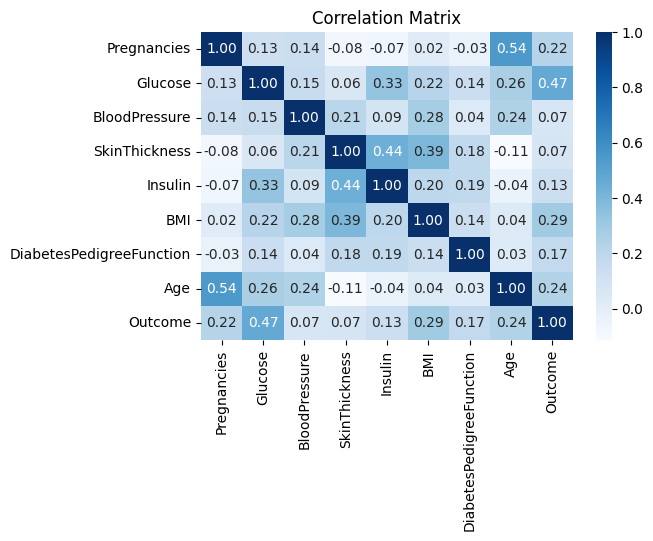

In [ ]:
# Вычисление корреляционной матрицы
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

###Применение моделей

In [ ]:
#Используем пайплайн для удобства, в для стандартизации данных используем StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error as mse

In [ ]:
#Выделим признаки и целевую переменную
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
#Разделим их на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

####SVM

#####Линейное ядро

In [ ]:
linear_SVM = Pipeline([
    ('Scaler', MinMaxScaler()),
    ('linear_SVM', SVC(kernel = 'linear'))
])

linear_SVM.fit(X_train, y_train)

print('Accuracy тренировочной выборки:', round(linear_SVM.score(X_train, y_train), 3))
print('Accuracy для тестовой выборки:', round(linear_SVM.score(X_test, y_test), 3))

Accuracy тренировочной выборки: 0.779
Accuracy для тестовой выборки: 0.753


#####Полиномиальное ядро

In [ ]:
poly_SVM = Pipeline([
    ('Scaler', MinMaxScaler()),
    ('poly_SVM', SVC(kernel='poly'))
])

poly_SVM.fit(X_train, y_train)

print('Accuracy тренировочной выборки:', round(poly_SVM.score(X_train, y_train), 3))
print('Accuracy для тестовой выборки:', round(poly_SVM.score(X_test, y_test), 3))

Accuracy тренировочной выборки: 0.806
Accuracy для тестовой выборки: 0.734


#####Гауссово ядро

In [ ]:
rbf_SVM = Pipeline([
    ('Scaler', MinMaxScaler()),
    ('rbf_SVM', SVC(kernel='rbf'))
])

rbf_SVM.fit(X_train, y_train)

print('Accuracy тренировочной выборки:', round(rbf_SVM.score(X_train, y_train), 3))
print('Accuracy для тестовой выборки:', round(rbf_SVM.score(X_test, y_test), 3))

Accuracy тренировочной выборки: 0.8
Accuracy для тестовой выборки: 0.74


#####Сигмоидное ядро

In [ ]:
sigmoid_SVM = Pipeline([
    ('Scaler', MinMaxScaler()),
    ('sigmoid_SVM', SVC(kernel='sigmoid'))
])

sigmoid_SVM.fit(X_train, y_train)

print('Accuracy тренировочной выборки:', round(sigmoid_SVM.score(X_train, y_train), 3))
print('Accuracy для тестовой выборки:', round(sigmoid_SVM.score(X_test, y_test), 3))

Accuracy тренировочной выборки: 0.402
Accuracy для тестовой выборки: 0.422


####Решающие деревья

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

#####Критерий Gini

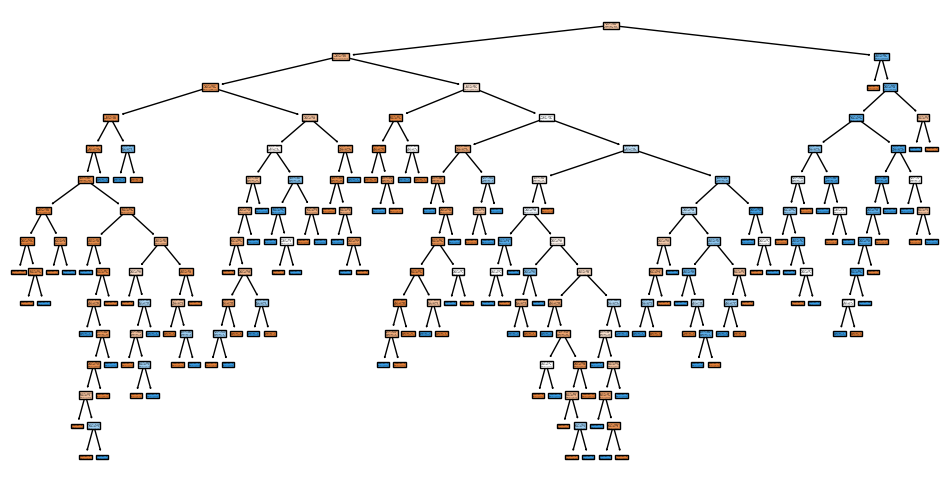

Accuracy для тренировочной выборки: 1.0
Accuracy для тестовой выборки: 0.688


In [ ]:
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
tree.plot_tree(DTC, filled=True)
plt.show()

print('Accuracy для тренировочной выборки:', round(DTC.score(X_train, y_train), 3))
print('Accuracy для тестовой выборки:', round(DTC.score(X_test, y_test), 3))

#####Критерий entropy

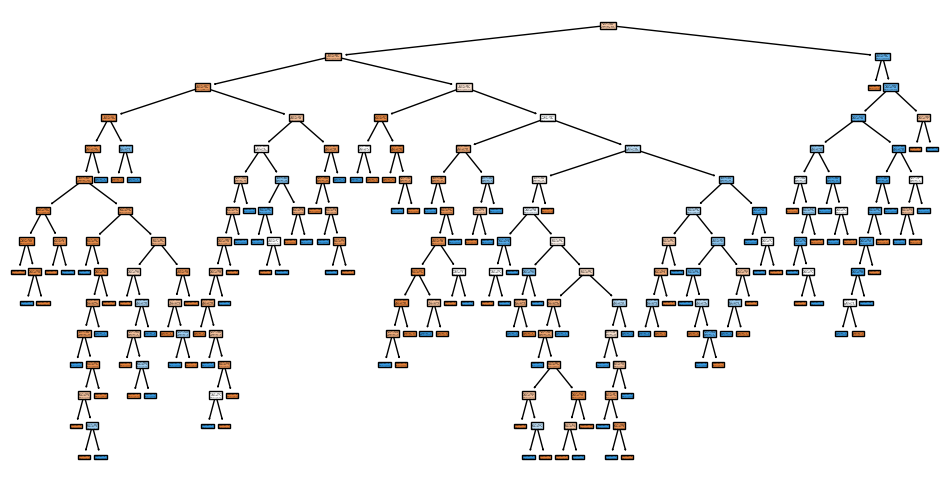

Accuracy для тренировочной выборки: 1.0
Accuracy для тестовой выборки: 0.695


In [ ]:
DTC = DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
tree.plot_tree(DTC, filled=True)
plt.show()

print('Accuracy для тренировочной выборки:', round(DTC.score(X_train, y_train), 3))
print('Accuracy для тестовой выборки:', round(DTC.score(X_test, y_test), 3))

#####Критерий log_loss

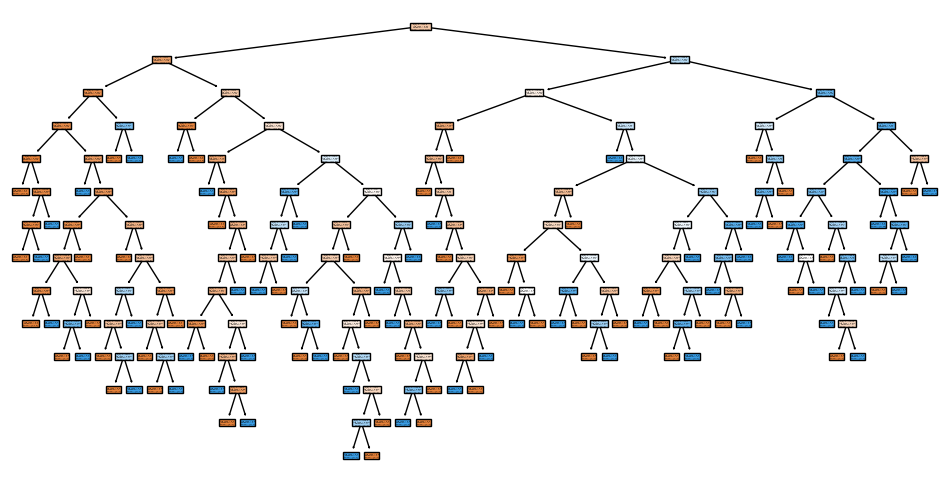

Accuracy для тренировочной выборки: 1.0
Accuracy для тестовой выборки: 0.721


In [ ]:
DTC = DecisionTreeClassifier(criterion='log_loss')
DTC.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
tree.plot_tree(DTC, filled=True)
plt.show()

print('Accuracy для тренировочной выборки:', round(DTC.score(X_train, y_train), 3))
print('Accuracy для тестовой выборки:', round(DTC.score(X_test, y_test), 3))